In [2]:

import torch

import torchvision
import torchvision.transforms as transforms


import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F


print("GPU available: {}".format(torch.cuda.is_available()))

# Device configuration
device = 'cuda'

GPU available: True


#### **Our Image plotting function**

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imgshow(title, image = None, size = 6):
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize=(size * aspect_ratio,size))
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.show()

### **Loading our MNIST Test Dataset**

In [4]:
# Transform to a PyTorch tensors and the normalize our valeus between -1 and +1
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, )) ])

# Load our Test Data and specify what transform to use when loading
testset = torchvision.datasets.MNIST('mnist', 
                                     train = False,
                                     download = True,
                                     transform = transform)

testloader = torch.utils.data.DataLoader(testset,
                                          batch_size = 128,
                                          shuffle = False,
                                          num_workers = 0)

# **Loading Out Model**


In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [6]:
net = Net()
net.to(device)

net.load_state_dict(torch.load('mnist_cnn_net.pth'))

<All keys matched successfully>

### **calculate it's accuracy**




In [7]:
correct = 0 
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.3}%')

Accuracy of the network on the 10000 test images: 97.8%


# **Displaying our Misclassified Images** ##


**Reminder** on why we use ```net.eval()``` and ```torch.no_grad()```

[Taken from Stackoverflow:](https://stackoverflow.com/questions/60018578/what-does-model-eval-do-in-pytorch)

**model.eval()** is a kind of switch for some specific layers/parts of the model that behave differently during training and inference (evaluating) time. For example, **Dropouts** Layers, BatchNorm Layers etc. You need to turn off them during model evaluation, and .eval() will do it for you. In addition, the common practice for evaluating/validation is using torch.no_grad() in pair with model.eval() to turn off gradients computation.

So, while we don't use Dropouts or BatchNorm in our model, it's good practice to use it when doing inference.

Actual Label: 5, Predicted Label: 6


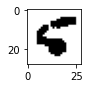

Actual Label: 9, Predicted Label: 4


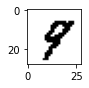

Actual Label: 6, Predicted Label: 0


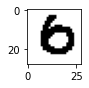

Actual Label: 9, Predicted Label: 7


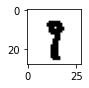

Actual Label: 2, Predicted Label: 7


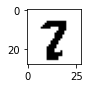

Actual Label: 5, Predicted Label: 3


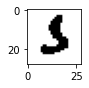

Actual Label: 6, Predicted Label: 0


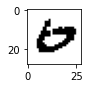

Actual Label: 8, Predicted Label: 2


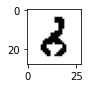

Actual Label: 2, Predicted Label: 1


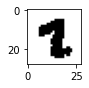

Actual Label: 5, Predicted Label: 3


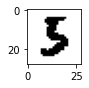

Actual Label: 7, Predicted Label: 3


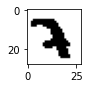

Actual Label: 8, Predicted Label: 4


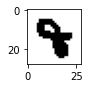

Actual Label: 0, Predicted Label: 6


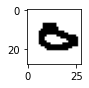

Actual Label: 5, Predicted Label: 8


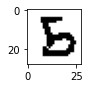

Actual Label: 4, Predicted Label: 9


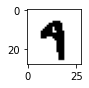

Actual Label: 8, Predicted Label: 7


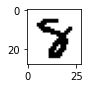

Actual Label: 9, Predicted Label: 7


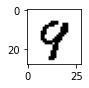

Actual Label: 8, Predicted Label: 9


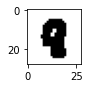

Actual Label: 6, Predicted Label: 0


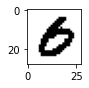

Actual Label: 5, Predicted Label: 3


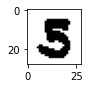

Actual Label: 6, Predicted Label: 5


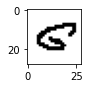

Actual Label: 7, Predicted Label: 2


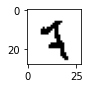

Actual Label: 6, Predicted Label: 8


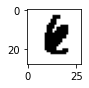

Actual Label: 8, Predicted Label: 4


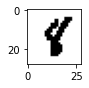

Actual Label: 6, Predicted Label: 1


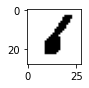

Actual Label: 6, Predicted Label: 8


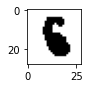

Actual Label: 7, Predicted Label: 2


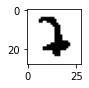

Actual Label: 9, Predicted Label: 4


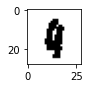

Actual Label: 9, Predicted Label: 0


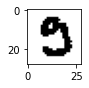

Actual Label: 7, Predicted Label: 1


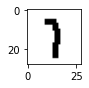

Actual Label: 5, Predicted Label: 9


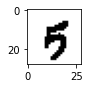

Actual Label: 5, Predicted Label: 7


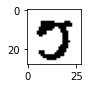

Actual Label: 8, Predicted Label: 3


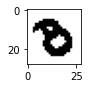

Actual Label: 7, Predicted Label: 2


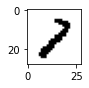

Actual Label: 5, Predicted Label: 3


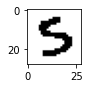

Actual Label: 8, Predicted Label: 2


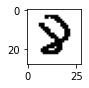

Actual Label: 5, Predicted Label: 6


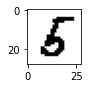

Actual Label: 5, Predicted Label: 3


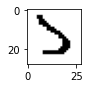

Actual Label: 9, Predicted Label: 4


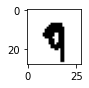

Actual Label: 7, Predicted Label: 1


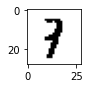

Actual Label: 7, Predicted Label: 9


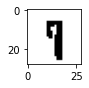

Actual Label: 1, Predicted Label: 6


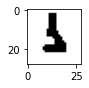

Actual Label: 8, Predicted Label: 7


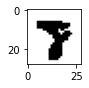

Actual Label: 9, Predicted Label: 3


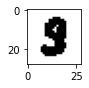

Actual Label: 6, Predicted Label: 4


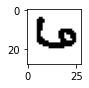

Actual Label: 2, Predicted Label: 6


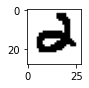

Actual Label: 0, Predicted Label: 6


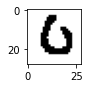

Actual Label: 2, Predicted Label: 0


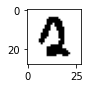

Actual Label: 3, Predicted Label: 7


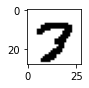

Actual Label: 9, Predicted Label: 3


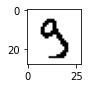

Actual Label: 8, Predicted Label: 0


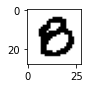

Actual Label: 7, Predicted Label: 2


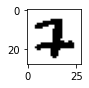

Actual Label: 2, Predicted Label: 7


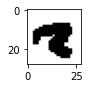

Actual Label: 8, Predicted Label: 3


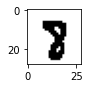

Actual Label: 8, Predicted Label: 3


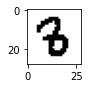

Actual Label: 9, Predicted Label: 4


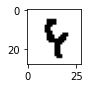

Actual Label: 5, Predicted Label: 0


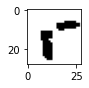

Actual Label: 7, Predicted Label: 2


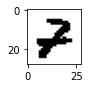

Actual Label: 1, Predicted Label: 7


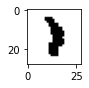

Actual Label: 5, Predicted Label: 3


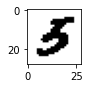

Actual Label: 5, Predicted Label: 6


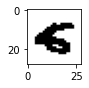

Actual Label: 2, Predicted Label: 7


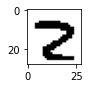

Actual Label: 4, Predicted Label: 9


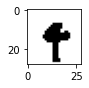

Actual Label: 7, Predicted Label: 4


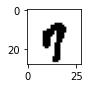

Actual Label: 8, Predicted Label: 1


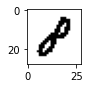

Actual Label: 2, Predicted Label: 0


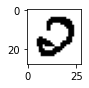

Actual Label: 6, Predicted Label: 0


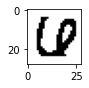

Actual Label: 5, Predicted Label: 9


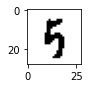

Actual Label: 9, Predicted Label: 2


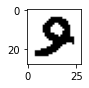

Actual Label: 4, Predicted Label: 9


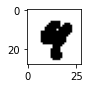

Actual Label: 6, Predicted Label: 1


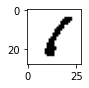

Actual Label: 1, Predicted Label: 2


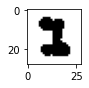

Actual Label: 9, Predicted Label: 1


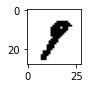

Actual Label: 1, Predicted Label: 6


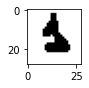

Actual Label: 8, Predicted Label: 0


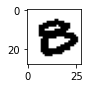

Actual Label: 9, Predicted Label: 0


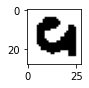

Actual Label: 5, Predicted Label: 9


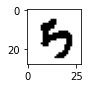

Actual Label: 9, Predicted Label: 1


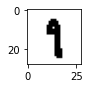

Actual Label: 9, Predicted Label: 1


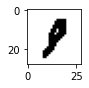

Actual Label: 9, Predicted Label: 4


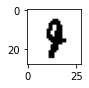

Actual Label: 6, Predicted Label: 4


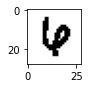

Actual Label: 2, Predicted Label: 1


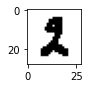

Actual Label: 6, Predicted Label: 8


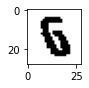

Actual Label: 2, Predicted Label: 4


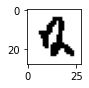

Actual Label: 5, Predicted Label: 3


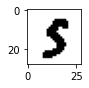

Actual Label: 5, Predicted Label: 3


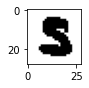

Actual Label: 5, Predicted Label: 8


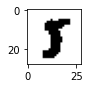

Actual Label: 5, Predicted Label: 3


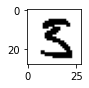

Actual Label: 7, Predicted Label: 2


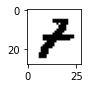

Actual Label: 6, Predicted Label: 1


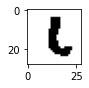

Actual Label: 9, Predicted Label: 4


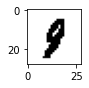

Actual Label: 8, Predicted Label: 0


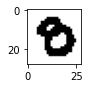

Actual Label: 3, Predicted Label: 2


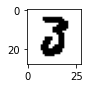

Actual Label: 3, Predicted Label: 2


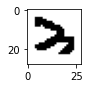

Actual Label: 5, Predicted Label: 7


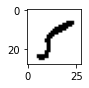

Actual Label: 9, Predicted Label: 7


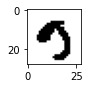

Actual Label: 5, Predicted Label: 3


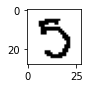

Actual Label: 9, Predicted Label: 7


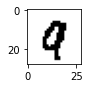

Actual Label: 6, Predicted Label: 8


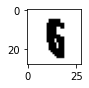

Actual Label: 9, Predicted Label: 7


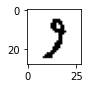

Actual Label: 1, Predicted Label: 2


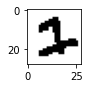

Actual Label: 5, Predicted Label: 9


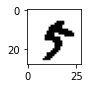

Actual Label: 8, Predicted Label: 3


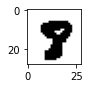

Actual Label: 2, Predicted Label: 3


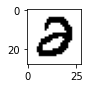

Actual Label: 6, Predicted Label: 0


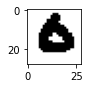

Actual Label: 9, Predicted Label: 1


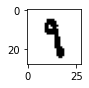

Actual Label: 6, Predicted Label: 4


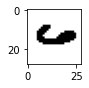

Actual Label: 5, Predicted Label: 0


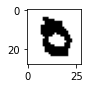

Actual Label: 8, Predicted Label: 0


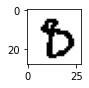

Actual Label: 9, Predicted Label: 3


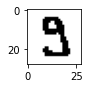

Actual Label: 7, Predicted Label: 0


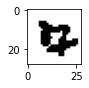

Actual Label: 2, Predicted Label: 3


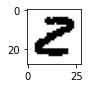

Actual Label: 5, Predicted Label: 3


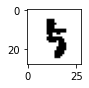

Actual Label: 6, Predicted Label: 0


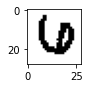

Actual Label: 7, Predicted Label: 2


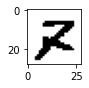

Actual Label: 5, Predicted Label: 8


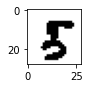

Actual Label: 4, Predicted Label: 2


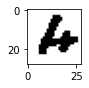

Actual Label: 7, Predicted Label: 3


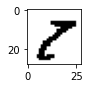

Actual Label: 5, Predicted Label: 0


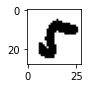

Actual Label: 9, Predicted Label: 4


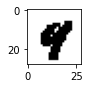

Actual Label: 5, Predicted Label: 6


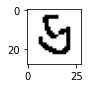

Actual Label: 1, Predicted Label: 3


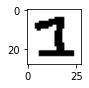

Actual Label: 4, Predicted Label: 2


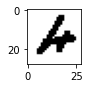

Actual Label: 5, Predicted Label: 3


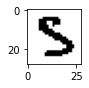

Actual Label: 9, Predicted Label: 4


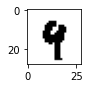

Actual Label: 0, Predicted Label: 2


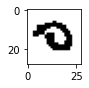

Actual Label: 8, Predicted Label: 0


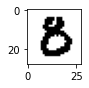

Actual Label: 9, Predicted Label: 3


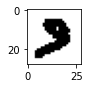

Actual Label: 9, Predicted Label: 4


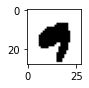

Actual Label: 5, Predicted Label: 1


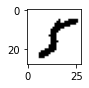

Actual Label: 9, Predicted Label: 0


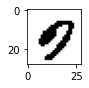

Actual Label: 2, Predicted Label: 7


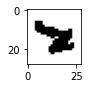

Actual Label: 2, Predicted Label: 7


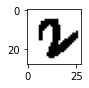

Actual Label: 9, Predicted Label: 7


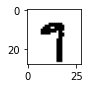

Actual Label: 7, Predicted Label: 3


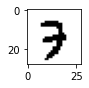

Actual Label: 2, Predicted Label: 1


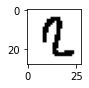

Actual Label: 3, Predicted Label: 2


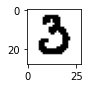

Actual Label: 2, Predicted Label: 7


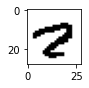

Actual Label: 3, Predicted Label: 7


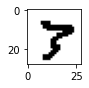

Actual Label: 5, Predicted Label: 3


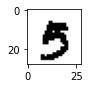

Actual Label: 5, Predicted Label: 3


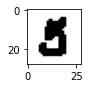

Actual Label: 9, Predicted Label: 4


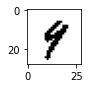

Actual Label: 8, Predicted Label: 7


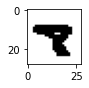

Actual Label: 9, Predicted Label: 1


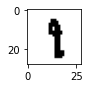

Actual Label: 6, Predicted Label: 5


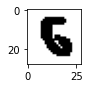

Actual Label: 6, Predicted Label: 8


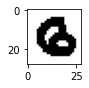

Actual Label: 8, Predicted Label: 4


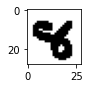

Actual Label: 8, Predicted Label: 9


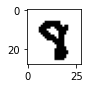

Actual Label: 8, Predicted Label: 3


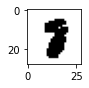

Actual Label: 3, Predicted Label: 9


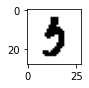

Actual Label: 9, Predicted Label: 4


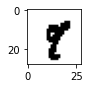

Actual Label: 5, Predicted Label: 6


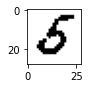

Actual Label: 8, Predicted Label: 0


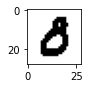

Actual Label: 6, Predicted Label: 0


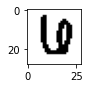

Actual Label: 9, Predicted Label: 4


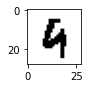

Actual Label: 8, Predicted Label: 4


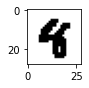

Actual Label: 8, Predicted Label: 3


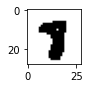

Actual Label: 1, Predicted Label: 6


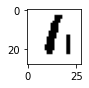

Actual Label: 7, Predicted Label: 9


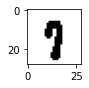

Actual Label: 2, Predicted Label: 3


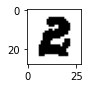

Actual Label: 1, Predicted Label: 0


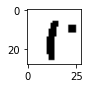

Actual Label: 3, Predicted Label: 7


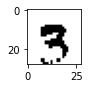

Actual Label: 8, Predicted Label: 6


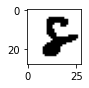

Actual Label: 4, Predicted Label: 7


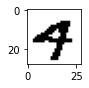

Actual Label: 7, Predicted Label: 0


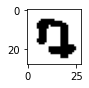

Actual Label: 5, Predicted Label: 3


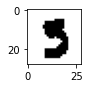

Actual Label: 3, Predicted Label: 8


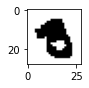

Actual Label: 5, Predicted Label: 3


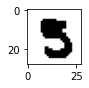

Actual Label: 3, Predicted Label: 8


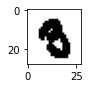

Actual Label: 5, Predicted Label: 9


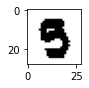

Actual Label: 5, Predicted Label: 3


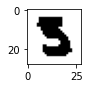

Actual Label: 5, Predicted Label: 3


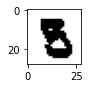

Actual Label: 5, Predicted Label: 9


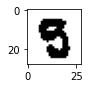

Actual Label: 5, Predicted Label: 3


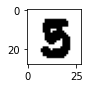

Actual Label: 9, Predicted Label: 3


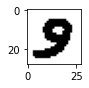

Actual Label: 9, Predicted Label: 3


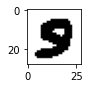

Actual Label: 9, Predicted Label: 3


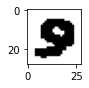

Actual Label: 9, Predicted Label: 3


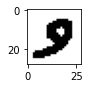

Actual Label: 9, Predicted Label: 0


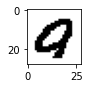

Actual Label: 9, Predicted Label: 7


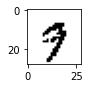

Actual Label: 0, Predicted Label: 7


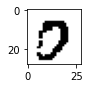

Actual Label: 8, Predicted Label: 7


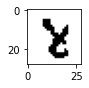

Actual Label: 0, Predicted Label: 4


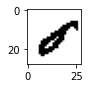

Actual Label: 8, Predicted Label: 7


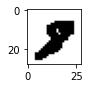

Actual Label: 1, Predicted Label: 6


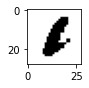

Actual Label: 6, Predicted Label: 4


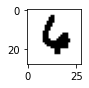

Actual Label: 6, Predicted Label: 4


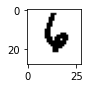

Actual Label: 8, Predicted Label: 9


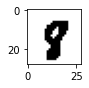

Actual Label: 8, Predicted Label: 3


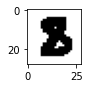

Actual Label: 5, Predicted Label: 8


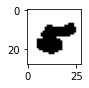

Actual Label: 2, Predicted Label: 4


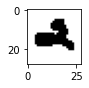

Actual Label: 2, Predicted Label: 1


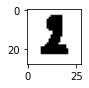

Actual Label: 5, Predicted Label: 8


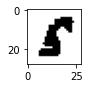

Actual Label: 2, Predicted Label: 1


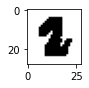

Actual Label: 2, Predicted Label: 1


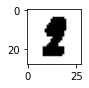

Actual Label: 6, Predicted Label: 4


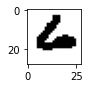

Actual Label: 8, Predicted Label: 6


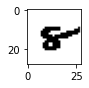

Actual Label: 8, Predicted Label: 6


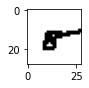

Actual Label: 8, Predicted Label: 6


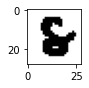

Actual Label: 7, Predicted Label: 2


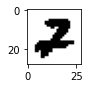

Actual Label: 7, Predicted Label: 2


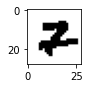

Actual Label: 7, Predicted Label: 2


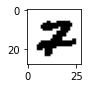

Actual Label: 7, Predicted Label: 2


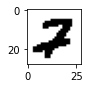

Actual Label: 7, Predicted Label: 2


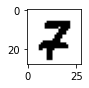

Actual Label: 9, Predicted Label: 4


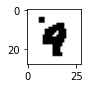

Actual Label: 0, Predicted Label: 8


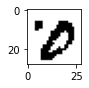

Actual Label: 9, Predicted Label: 7


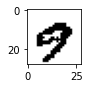

Actual Label: 9, Predicted Label: 7


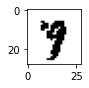

Actual Label: 5, Predicted Label: 6


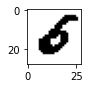

Actual Label: 5, Predicted Label: 6


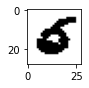

Actual Label: 2, Predicted Label: 0


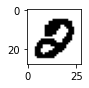

Actual Label: 5, Predicted Label: 0


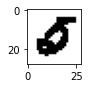

Actual Label: 5, Predicted Label: 0


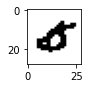

Actual Label: 2, Predicted Label: 0


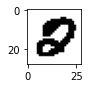

Actual Label: 2, Predicted Label: 3


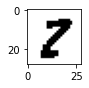

Actual Label: 2, Predicted Label: 7


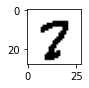

Actual Label: 3, Predicted Label: 7


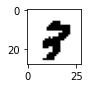

Actual Label: 5, Predicted Label: 6


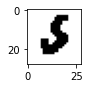

In [8]:
net.eval()


with torch.no_grad():
    for data in testloader:
        images, labels = data

        images = images.to(device)
        labels = labels.to(device)

        outputs = net(images)

        predictions = torch.argmax(outputs, dim=1)

        
        for i in range(data[0].shape[0]):
            pred = predictions[i].item()
            label = labels[i]
            if(label != pred):
                print(f'Actual Label: {label}, Predicted Label: {pred}')       
                img = np.reshape(images[i].cpu().numpy(),[28,28])
                imgshow("", np.uint8(img), size = 1)

# **Creating our Confusion Matrix**


In [9]:
from sklearn.metrics import confusion_matrix


pred_list = torch.zeros(0, dtype=torch.long, device='cpu')
label_list = torch.zeros(0, dtype=torch.long, device='cpu')

with torch.no_grad():
    for i, (inputs, classes) in enumerate(testloader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = net(inputs)
        _, preds = torch.max(outputs, 1)

        pred_list = torch.cat([pred_list, preds.view(-1).cpu()])
        label_list = torch.cat([label_list, classes.view(-1).cpu()])

conf_mat = confusion_matrix(label_list.numpy(), pred_list.numpy())
print(conf_mat)

c:\Users\saeid\anaconda3\envs\pytorch\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[[ 974    0    1    0    1    0    2    1    1    0]
 [   1 1126    2    1    0    0    4    1    0    0]
 [   4    6 1008    4    2    0    1    7    0    0]
 [   0    0    3 1000    0    0    0    4    2    1]
 [   0    0    2    0  976    0    0    1    0    3]
 [   5    1    0   19    0  846    8    2    5    6]
 [   7    3    0    0    6    2  935    0    5    0]
 [   2    2   12    3    1    0    0 1006    0    2]
 [   6    1    2    7    4    0    4    5  942    3]
 [   4    5    1    8   13    0    0    9    0  969]]


In [10]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

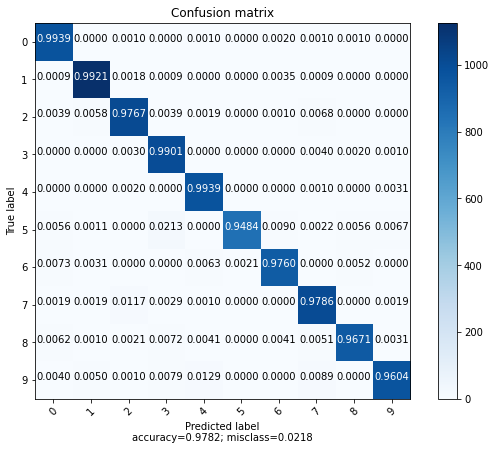

In [11]:
target_names = list(range(0,10))
plot_confusion_matrix(conf_mat, target_names)